# Predictive Methods Project :

<ul>
  <li></li>
  <li></li>
  <li></li>
  <li></li>
  <li></li>
</ul>

Rendu :<br>
- Notebook =>  <br>
- Rapport =>  <br>
- Brouillon, plan, idées & liens utiles =>  <br>

## 0°/ Introduction :

This part will be filled when we find a correct source of data and all agreed on the topic.

## 1°/ Set up :

### 1.1°/ Pip install & Import :

In [1]:
# Some libraries may need to be installed beforehand, add any !pip install here
#!pip install pandas
#!pip install geopandas
#!pip install tqdm

In [1]:
import pandas as pd
import numpy as np
import warnings

# Useful to show loop progress
from tqdm import tqdm

# Turn off warning
warnings.filterwarnings('ignore')

### 1.2°/ Import datasets

In [ ]:
# =============================================================
# == I set up the Corse zone (2A, 2B) as number (201, 202)   ==
# == Be mindful of this particularity throughout the project ==
# =============================================================

dic_test = {
    '01' : "Ain",
    '03' : "Allier", 
    '04' : "Alpes-de-Haute-Provence",
    '06' : "Alpes-Maritimes", 
    '07' : "Ardèche",
    '13' : "Bouches-du-Rhône",
    '15' : "Cantal",
    '26' : "Drôme",
    '38' : "Isère",
    '42' : "Loire", 
    '43' : "Haute-Loire",
    '69' : "Rhône",
    '73' : "Savoie", 
    '74' : "Haute-Savoie",
    '83' : "Var", 
    '84' : "Vaucluse"
}

En_France_métropolitaine = {
    '01' : "Ain", 
    '02' : "Aisne", 
    '03' : "Allier", 
    '04' : "Alpes-de-Haute-Provence", 
    '05' : "Hautes-Alpes", 
    '06' : "Alpes-Maritimes", 
    '07' : "Ardèche", 
    '08' : "Ardennes", 
    '09' : "Ariège", 
    '10' : "Aube", 
    '11' : "Aude", 
    '12' : "Aveyron", 
    '13' : "Bouches-du-Rhône", 
    '14' : "Calvados", 
    '15' : "Cantal", 
    '16' : "Charente", 
    '17' : "Charente-Maritime", 
    '18' : "Cher", 
    '19' : "Corrèze", 
    '201' : "Corse-du-Sud", 
    '202' : "Haute-Corse", 
    '21' : "Côte-d'Or", 
    '22' : "Côtes-d'Armor", 
    '23' : "Creuse", 
    '24' : "Dordogne", 
    '25' : "Doubs", 
    '26' : "Drôme", 
    '27' : "Eure", 
    '28' : "Eure-et-Loir", 
    '29' : "Finistère", 
    '30' : "Gard", 
    '31' : "Haute-Garonne", 
    '32' : "Gers", 
    '33' : "Gironde", 
    '34' : "Hérault", 
    '35' : "Ille-et-Vilaine", 
    '36' : "Indre", 
    '37' : "Indre-et-Loire", 
    '38' : "Isère", 
    '39' : "Jura", 
    '40' : "Landes", 
    '41' : "Loir-et-Cher", 
    '42' : "Loire", 
    '43' : "Haute-Loire", 
    '44' : "Loire-Atlantique", 
    '45' : "Loiret", 
    '46' : "Lot", 
    '47' : "Lot-et-Garonne", 
    '48' : "Lozère", 
    '49' : "Maine-et-Loire", 
    '50' : "Manche", 
    '51' : "Marne", 
    '52' : "Haute-Marne", 
    '53' : "Mayenne", 
    '54' : "Meurthe-et-Moselle", 
    '55' : "Meuse", 
    '56' : "Morbihan", 
    '57' : "Moselle", 
    '58' : "Nièvre", 
    '59' : "Nord", 
    '60' : "Oise", 
    '61' : "Orne", 
    '62' : "Pas-de-Calais", 
    '63' : "Puy-de-Dôme", 
    '64' : "Pyrénées-Atlantiques", 
    '65' : "Hautes-Pyrénées", 
    '66' : "Pyrénées-Orientales", 
    '67' : "Bas-Rhin", 
    '68' : "Haut-Rhin", 
    '69' : "Rhône", 
    '70' : "Haute-Saône", 
    '71' : "Saône-et-Loire", 
    '72' : "Sarthe", 
    '73' : "Savoie", 
    '74' : "Haute-Savoie", 
    '75' : "Paris", 
    '76' : "Seine-Maritime", 
    '77' : "Seine-et-Marne", 
    '78' : "Yvelines", 
    '79' : "Deux-Sèvres", 
    '80' : "Somme", 
    '81' : "Tarn", 
    '82' : "Tarn-et-Garonne", 
    '83' : "Var", 
    '84' : "Vaucluse", 
    '85' : "Vendée", 
    '86' : "Vienne", 
    '87' : "Haute-Vienne", 
    '88' : "Vosges", 
    '89' : "Yonne", 
    '90' : "Territoire_de_Belfort", 
    '91' : "Essonne", 
    '92' : "Hauts-de-Seine", 
    '93' : "Seine-Saint-Denis", 
    '94' : "Val-de-Marne", 
    '95' : "Val-d'Oise"
}

Region = {
    "Auvergne-Rhône-Alpes": [1, 3, 7, 15, 26, 38, 42, 43, 69, 73, 74],
    "Bourgogne-Franche-Comté": [21, 25, 39, 58, 70, 71, 89, 90],
    "Bretagne": [22, 29, 35, 56],
    "Centre-Val de Loire": [18, 28, 36, 37, 41, 45],
    "Grand Est": [8, 10, 51, 52, 54, 55, 57, 67, 68, 88],
    "Hauts-de-France": [2, 59, 60, 62, 80],
    "Île-de-France": [75, 77, 78, 91, 92, 93, 94, 95],
    "Normandie": [14, 27, 50, 61, 76],
    "Nouvelle-Aquitaine": [16, 17, 19, 23, 24, 33, 40, 47, 64, 79, 86, 87],
    "Occitanie": [9, 11, 12, 30, 31, 32, 34, 46, 48, 65, 66, 81, 82],
    "Pays de la Loire": [44, 49, 53, 72, 85],
    "Provence-Alpes-Côte d'Azur": [4, 6, 13, 83, 84],
}

# df.columns => ctrl + c / ctrl + v
Col_RTT = ['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ', 'RR', 'QRR',
           'TN', 'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM',
           'TNTXM', 'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50',
           'QTN50', 'DG', 'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY',
           'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI',
           'QHXI', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S',
           'QFXI3S', 'DXI3S', 'QDXI3S', 'HXI3S', 'QHXI3S', 'DRR', 'QDRR']

# df.columns => ctrl + c / ctrl + v
Col_autre_para = ['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ', 'DHUMEC',
                  'QDHUMEC', 'PMERM', 'QPMERM', 'PMERMIN', 'QPMERMIN', 'INST', 'QINST',
                  'GLOT', 'QGLOT', 'DIFT', 'QDIFT', 'DIRT', 'QDIRT', 'INFRART',
                  'QINFRART', 'UV', 'QUV', 'UV_INDICEX', 'QUV_INDICEX', 'SIGMA', 'QSIGMA',
                  'UN', 'QUN', 'HUN', 'QHUN', 'UX', 'QUX', 'HUX', 'QHUX', 'UM', 'QUM',
                  'DHUMI40', 'QDHUMI40', 'DHUMI80', 'QDHUMI80', 'TSVM', 'QTSVM', 'ETPMON',
                  'QETPMON', 'ETPGRILLE', 'QETPGRILLE', 'ECOULEMENTM', 'QECOULEMENTM',
                  'HNEIGEF', 'QHNEIGEF', 'NEIGETOTX', 'QNEIGETOTX', 'NEIGETOT06',
                  'QNEIGETOT06', 'NEIG', 'QNEIG', 'BROU', 'QBROU', 'ORAG', 'QORAG',
                  'GRESIL', 'QGRESIL', 'GRELE', 'QGRELE', 'ROSEE', 'QROSEE', 'VERGLAS',
                  'QVERGLAS', 'SOLNEIGE', 'QSOLNEIGE', 'GELEE', 'QGELEE', 'FUMEE',
                  'QFUMEE', 'BRUME', 'QBRUME', 'ECLAIR', 'QECLAIR', 'NB300', 'QNB300',
                  'BA300', 'QBA300', 'TMERMIN', 'QTMERMIN', 'TMERMAX', 'QTMERMAX',
                  'Year']

d = {'NUM_POSTE' : 'string',
'NOM_USUEL' : 'string',
'LAT' : 'string',
'LON' : 'string',
'ALTI' : 'string',
'AAAAMMJJ' : 'string',
'RR' : 'string',
'TM' : 'string',
'TN50' : 'string',
'FFM' : 'string',
'DRR' : 'string',
'DHUMEC' : 'string',
'INST' : 'float',
'UV' : 'float',
'UM' : 'float',
'NEIG' : 'int',
'BROU' : 'int',
'ORAG' : 'int',
'GRESIL' : 'int',
'GRELE' : 'int',
'ROSEE' : 'int',
'VERGLAS' : 'int',
'SOLNEIGE' : 'int',
'GELEE' : 'int',
'FUMEE' : 'int',
'BRUME' : 'int',
'ECLAIR' : 'int'
}

Col_to_drop = ['HTN', 'HTX', 'TNTXM', 'TAMPLI', 'TNSOL', 'DG', 'FF2M', 'FXY', 'DXY',
               'HXY', 'FXI', 'DXI', 'HXI', 'FXI2', 'DXI2', 'HXI2', 'FXI3S', 'DXI3S',
               'HXI3S', 'PMERM', 'PMERMIN', 'GLOT', 'DIFT', 'UV_INDICEX', 'SIGMA', 'UN',
               'HUN', 'UX', 'HUX', 'DHUMI40', 'DHUMI80', 'TSVM', 'ETPMON', 'ETPGRILLE',
               'ECOULEMENTM', 'HNEIGEF', 'NEIGETOTX', 'NEIGETOT06', 'NB300', 'BA300',
               'TMERMIN', 'TMERMAX']

Q_col_to_drop = ['QRR','QTN', 'QHTN', 'QTX', 'QHTX', 'QTM', 'QTNTXM', 'QTAMPLI', 'QTNSOL',
                 'QTN50', 'QDG', 'QFFM', 'QFF2M', 'QFXY', 'QDXY', 'QHXY', 'QFXI', 'QDXI',
                 'QHXI', 'QFXI2', 'QDXI2', 'QHXI2', 'QFXI3S', 'QDXI3S', 'QHXI3S', 'QDRR',
                 'QDHUMEC', 'QPMERM', 'QPMERMIN', 'QINST', 'QGLOT', 'QDIFT', 'QDIRT',
                 'QINFRART', 'QUV', 'QUV_INDICEX', 'QSIGMA', 'QUN', 'QHUN', 'QUX', 'QHUX', 'QUM',
                 'QDHUMI40', 'QDHUMI80', 'QTSVM', 'QETPMON', 'QETPGRILLE', 'QECOULEMENTM',
                 'QHNEIGEF', 'QNEIGETOTX', 'QNEIGETOT06', 'QNEIG', 'QBROU', 'QORAG', 'QGRESIL',
                 'QGRELE', 'QROSEE', 'QVERGLAS', 'QSOLNEIGE', 'QGELEE', 'QFUMEE', 'QBRUME',
                 'QECLAIR', 'QNB300', 'QBA300', 'QTMERMIN', 'QTMERMAX']

In [19]:
def base_data_cleaning(df, start_year, end_year):
    """
    This function does 2 things :
    - By manually setting it, keep only data between 2 given year
    - It allow to drop all rows with NaN value that should have contained mandatory information
    """

    # I'm a baka
    df['AAAAMMJJ'] = df['AAAAMMJJ'].astype('str')
    df['NUM_POSTE'] = df['NUM_POSTE'].astype('str')

    # Drop rows without id
    df = df.dropna(subset = ['NUM_POSTE', 'AAAAMMJJ'])

    # ===========================================
    # == Only keep Data between the set period ==
    # ===========================================
    df = df[df['AAAAMMJJ'].str[:4].astype('int').between(start_year, end_year)]

    return df

def modify_columns(df, key, value):
    """
    Extract the feature of the date columns
    Also assign the department number and name to the extracted data
    """
    df = df.drop(Col_to_drop, axis = 1)
    df = df.drop(Q_col_to_drop, axis = 1)

    df['Year'] = df['AAAAMMJJ'].str[:4]
    df['Month'] = df['AAAAMMJJ'].str[4:6]
    df['Day'] = df['AAAAMMJJ'].str[-2:]
    
    df['Dept_numb'] = key
    df['Dept_name'] = value

    return df

def webo_scrappo_el_dataframo(start_y, end_y):
    """
    Extract the weather data from all department of the metropolitan France on a given period of time
    This function use the following link :
    https://www.data.gouv.fr/datasets/donnees-climatologiques-de-base-quotidiennes
    To extract from data.gouv for each department all 4 related datasets.
    Then proceed by merging and concatenating all of them
    """
    df_metropo = pd.DataFrame()
    dept_error = []

    # Data source : https://www.data.gouv.fr/datasets/donnees-climatologiques-de-base-quotidiennes

    # The download link is such as :
    # url_base + "department number" + url_end{RTT_1950, autre_1950, RTT_2025, autre_2025}
    # We have 95 department in the metropolitan area : 95 'Dept_number'
    # All department have a dataset for RTT & Other_feature, then those cover both the 1950-2023 period and 2024-2025 period : 4 datasets per department
    # => around 95*4 = 380 url

    url_base = "https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/BASE/QUOT/Q_"
    
    url_end_RTT_1950 = "_previous-1950-2023_RR-T-Vent.csv.gz"
    url_end_autre_1950 = "_previous-1950-2023_autres-parametres.csv.gz"
    url_end_RTT_2025 = "_latest-2024-2025_RR-T-Vent.csv.gz"
    url_end_autre_2025 = "_latest-2024-2025_autres-parametres.csv.gz"

    for key, value in tqdm(dic_test.items(), desc="Downloading depts"):

        try :

            url = url_base + key
            df_temp_RTT_1950 = pd.read_csv(url + url_end_RTT_1950, sep = ';', compression = 'gzip')
            df_temp_autre_1950 = pd.read_csv(url + url_end_autre_1950, sep = ';', compression = 'gzip')
            df_temp_RTT_2025 = pd.read_csv(url + url_end_RTT_2025, sep = ';', compression = 'gzip')
            df_temp_autre_2025 = pd.read_csv(url + url_end_autre_2025, sep = ';', compression = 'gzip')

            df_temp_RTT_1950 = base_data_cleaning(df_temp_RTT_1950, start_y, end_y)
            df_temp_autre_1950 = base_data_cleaning(df_temp_autre_1950, start_y, end_y)
            df_temp_RTT_2025 = base_data_cleaning(df_temp_RTT_2025, start_y, end_y)
            df_temp_autre_2025 = base_data_cleaning(df_temp_autre_2025, start_y, end_y)

            df_temp_1950 = pd.merge(df_temp_RTT_1950, df_temp_autre_1950, on = ['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ'], how = "left")
            df_temp_2025 = pd.merge(df_temp_RTT_2025, df_temp_autre_2025, on = ['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ'], how = "left")

            df_temp = pd.concat([df_temp_1950, df_temp_2025])
            
            df_temp = modify_columns(df_temp, key, value)

            df_metropo = pd.concat([df_metropo, df_temp])
            
            #print(key)
        
        except:
            dept_error.append(key)

        # This print the progress
        # tqdm.write(f"➡ Dept: {key}")

    print(dept_error)

    return df_metropo

In [20]:
df = webo_scrappo_el_dataframo(2015, 2025)
df.shape

[]


(2659354, 36)

In [6]:
# For when the dataframe will be clean :
df.to_csv("datasets/Weather_data_2010-2025.csv", index=False)

In [ ]:
# # 1950-2023 RRT
# "https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/BASE/QUOT/Q_01_previous-1950-2023_RR-T-Vent.csv.gz"
# # 1950-2023 Autre para
# "https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/BASE/QUOT/Q_01_previous-1950-2023_autres-parametres.csv.gz"
# # 2024-2025 RRT
# "https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/BASE/QUOT/Q_01_latest-2024-2025_RR-T-Vent.csv.gz"
# # 2024-2025 Autre para
# "https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/BASE/QUOT/Q_01_latest-2024-2025_autres-parametres.csv.gz"
# 
# df_test = pd.read_csv("https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/BASE/QUOT/Q_01_latest-2024-2025_RR-T-Vent.csv.gz", sep = ';',compression = 'gzip')
# df_test.head()

### 1.3°/ Visualization set up :

In [6]:
# If you're working on an anaconda environment, do the following :
# *Open anaconda prompt terminal* (NOT ANOTHER ONE, THIS ONE ESPECIALLY)
# conda create -n "name_of_your_environment" python=3.14
# conda activate name_of_your_environment
# conda install -c conda-forge geopandas
# pip install of conda install on any other terminal will end in a error with the "pyogrio" module. Why ? The hell I don't know.

# https://www.data.gouv.fr/api/1/datasets/r/aacf9338-8944-4513-a7b9-4cd7c2db2fa9

import geopandas as gpd
import matplotlib as plt

In [7]:
# Non metropolitan France + Corsia
reg_useless = ['01', '02', '03', '04', '06', '94']

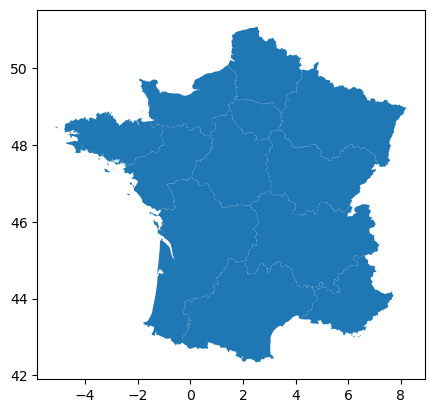

In [9]:
gdf = gpd.read_file('datasets/regions-20180101.shp')
gdf = gdf[~gdf['code_insee'].isin(reg_useless)]
gdf.plot() ;

## 2°/ Pre-processing :

### 2.0°/ Merge datasets (optional)

### 2.1 : Data cleaning :

In [12]:
tt = ['ORAG',
'GRESIL',
'GRELE',
'ROSEE',
'VERGLAS',
'SOLNEIGE',
'GELEE',
'FUMEE',
'BRUME',
'ECLAIR']

for col in tt:
    print(df[col].value_counts())

ORAG
0.0    83762
1.0    43719
Name: count, dtype: int64
GRESIL
0.0    34475
1.0      116
Name: count, dtype: int64
GRELE
0.0    51404
1.0     2738
Name: count, dtype: int64
ROSEE
0.0    77164
1.0     8816
Name: count, dtype: int64
VERGLAS
0.0    56333
1.0     2324
Name: count, dtype: int64
SOLNEIGE
0.0    34717
1.0      321
Name: count, dtype: int64
GELEE
0.0    76594
1.0     1681
Name: count, dtype: int64
FUMEE
0.0    93745
1.0       41
Name: count, dtype: int64
BRUME
0.0    79354
1.0    16114
Name: count, dtype: int64
ECLAIR
0.0    32412
1.0     1723
Name: count, dtype: int64


In [35]:
df.isna().sum()

NUM_POSTE          0
NOM_USUEL          0
LAT                0
LON                0
ALTI               0
AAAAMMJJ           0
RR            106237
TN            639428
TX            640052
TM            995846
TN50         2535482
FFM          1951081
DRR          2569369
DHUMEC       2621346
INST         2503434
DIRT         2654496
INFRART      2656223
UV           2656229
UM           1871437
NEIG         2476118
BROU         2511881
ORAG         2530464
GRESIL       2623354
GRELE        2603803
ROSEE        2571965
VERGLAS      2599288
SOLNEIGE     2622907
GELEE        2579670
FUMEE        2564159
BRUME        2562477
ECLAIR       2623810
Year               0
Month              0
Day                0
Dept_numb          0
Dept_name          0
dtype: int64

In [34]:
station_cool = df[df['ORAG'].isin([1.0, 0.0])]
good = station_cool['NUM_POSTE'].value_counts().index

station_pas_cool = df[~df['ORAG'].isin([1.0, 0.0])]
bad = station_pas_cool['NUM_POSTE'].value_counts().index

common = []
for el in good:
    if el in bad:
        common.append(el)

for el in bad:
    if el in good and el not in common:
        common.append(el)

print(len(common))
print(len(good))
print(len(bad))


519
519
934


### 2.2°/ Explanatory data analysis :

## 3°/ Feature engineering (if needed) :

<ul>
  <li>List here the different feature extraction we can use depending on the model we will use. (Again this part may not be used so don't waste time on it)</li>
</ul>

## 4°/ Modeling :

We can do multiple model here to obtain different results so that we can debate over them later on.

### 4.1°/ 1st model :

### 4.i°/ i-ième model :

## 5°/ Models prediction & Metrics evaluation :